In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [219]:
import warnings
warnings.filterwarnings('ignore')

In [220]:
#load the dataset from csv file to a pandas dataframe
insurance_dataset = pd.read_csv('/content/Medicalpremium.csv')
#first 5 rows
insurance_dataset.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [221]:
insurance_dataset.shape

(986, 11)

In [222]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [223]:
#check the missing values
insurance_dataset.isnull().sum()

,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


**Data Analysis**

In [224]:
#statistical Measures of the dataset
insurance_dataset.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


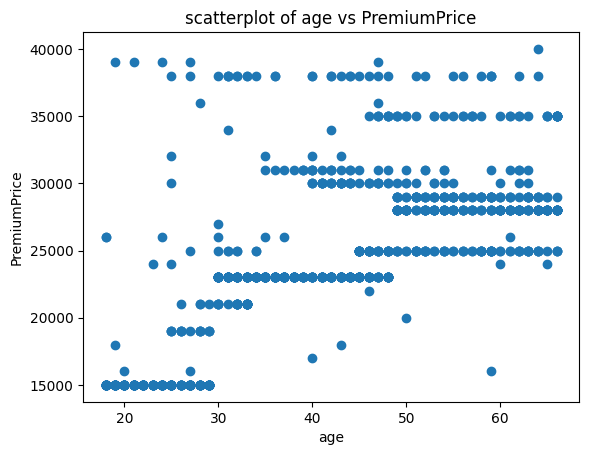

In [225]:
#plot a scatterplot to show how Age data & PremiumPrice data are related
plt.scatter(insurance_dataset['Age'],insurance_dataset['PremiumPrice'])
plt.xlabel("age")
plt.ylabel("PremiumPrice")
plt.title("scatterplot of age vs PremiumPrice")
plt.show()

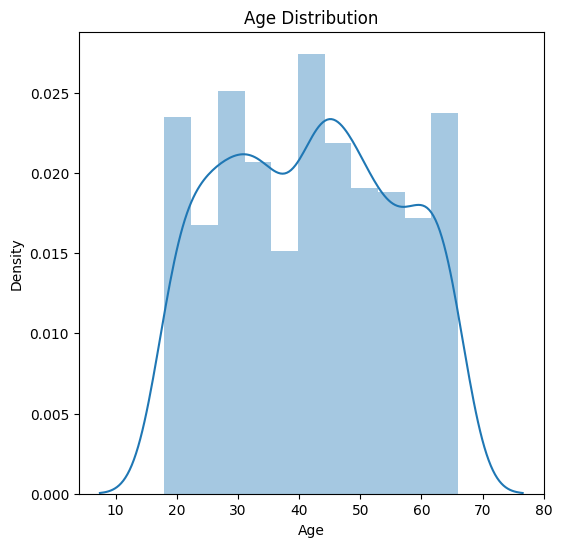

In [226]:
#distribution of Age value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['Age'])
plt.title('Age Distribution')
plt.show()

In [227]:
insurance_dataset['Diabetes'].value_counts()

,count
Diabetes,
0,572
1,414


In [228]:
insurance_dataset['AnyTransplants'].value_counts()

,count
AnyTransplants,
0,931
1,55


In [229]:
insurance_dataset['AnyChronicDiseases'].value_counts()

,count
AnyChronicDiseases,
0,808
1,178


Add BMI column to the dataset

In [230]:
def bmi_calculator(data):
  p_height = data['Height']
  p_weight = data['Weight']
  return p_weight/(p_height**2)

In [231]:
insurance_dataset['bmi'] = insurance_dataset.apply(bmi_calculator,axis = 1)
insurance_dataset= insurance_dataset.drop(columns=['Height','Weight'])
insurance_dataset.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,bmi
0,45,0,0,0,0,0,0,0,25000,0.002373
1,60,1,0,0,0,0,0,0,29000,0.002253
2,36,1,1,0,0,0,0,1,23000,0.002363
3,52,1,1,0,1,0,0,2,28000,0.002777
4,38,0,0,0,1,0,0,1,23000,0.003193


In [232]:
SC = StandardScaler()
insurance_dataset['Age']=SC.fit_transform(insurance_dataset[['Age']])
insurance_dataset.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,bmi
0,0.233197,0,0,0,0,0,0,0,25000,0.002373
1,1.307981,1,0,0,0,0,0,0,29000,0.002253
2,-0.411674,1,1,0,0,0,0,1,23000,0.002363
3,0.734763,1,1,0,1,0,0,2,28000,0.002777
4,-0.268369,0,0,0,1,0,0,1,23000,0.003193


Distribution of BMI column

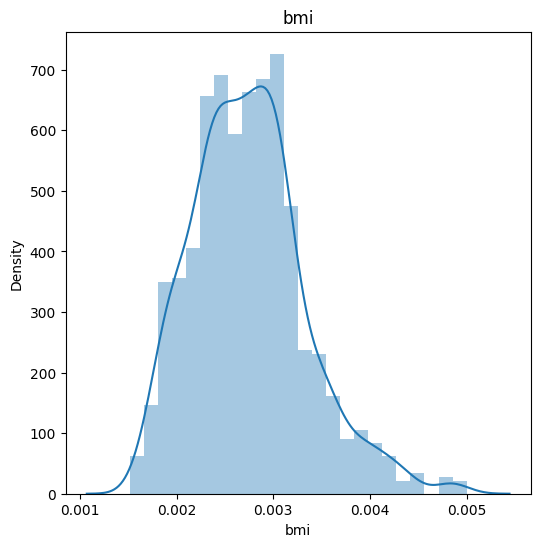

In [233]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('bmi')
plt.show()

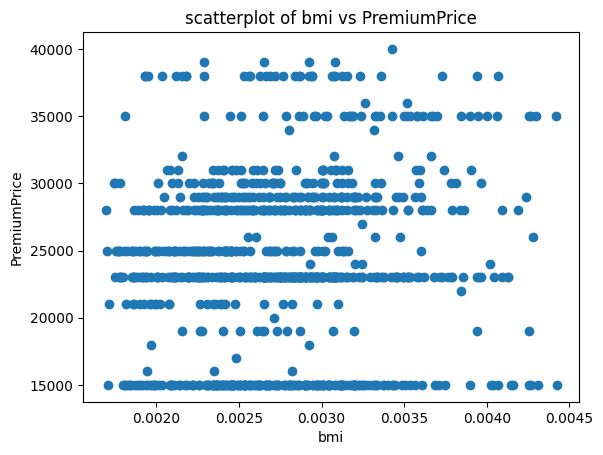

In [240]:
#plot a scatterplot to show how bmi data & PremiumPrice data are related
plt.scatter(insurance_dataset['bmi'],insurance_dataset['PremiumPrice'])
plt.xlabel("bmi")
plt.ylabel("PremiumPrice")
plt.title("scatterplot of bmi vs PremiumPrice")
plt.show()

In [241]:
insurance_dataset['KnownAllergies'].value_counts()

,count
KnownAllergies,
0,757
1,208


<Axes: ylabel='count'>

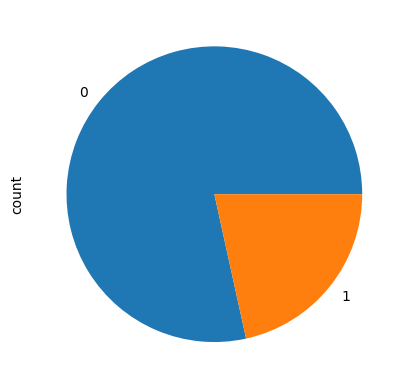

In [242]:
insurance_dataset['KnownAllergies'].value_counts().plot(kind='pie')

In [243]:
insurance_dataset['HistoryOfCancerInFamily'].value_counts()

,count
HistoryOfCancerInFamily,
0,851
1,114


In [244]:
insurance_dataset['NumberOfMajorSurgeries'].value_counts()

,count
NumberOfMajorSurgeries,
0,464
1,368
2,118
3,15


In [245]:
insurance_dataset['PremiumPrice'].describe()

,PremiumPrice
count,965.000000
mean,24348.186528
std,6233.609989
min,15000.000000
25%,21000.000000
50%,23000.000000
75%,28000.000000
max,40000.000000


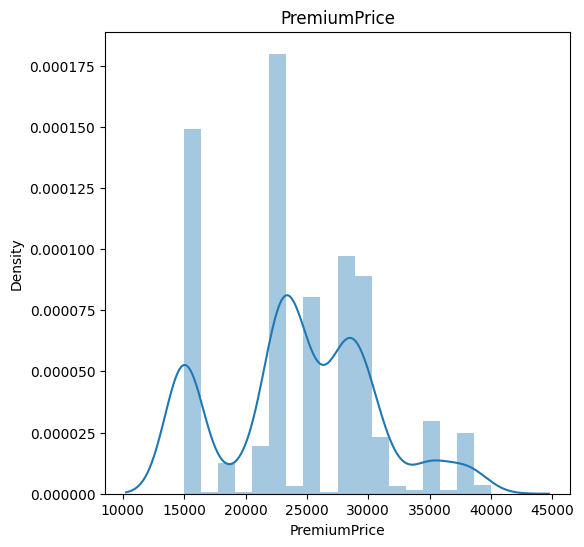

In [246]:
#distribution of Age value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['PremiumPrice'])
plt.title('PremiumPrice')
plt.show()

**Data preprocessing**

**Splitting the Features and Target**

In [247]:
#create two variables in one we put all the features & in another one the target variable
x = insurance_dataset.drop(columns=['PremiumPrice'])
y = insurance_dataset['PremiumPrice']

In [248]:
y

,PremiumPrice
0,25000
1,29000
2,23000
3,28000
4,23000
...,...
981,15000
982,28000
983,29000
984,39000


In [249]:
x.shape

(965, 9)

In [250]:
y.shape

(965,)

**Splitting the data into Training data & Testing data**

In [251]:
#create 4 arrays
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(965, 9) (772, 9) (193, 9)


In [252]:
x_train.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,bmi
18,1.093024,1,0,0,0,0,0,0,0.002507
672,-0.769935,0,0,0,1,0,0,0,0.002873
471,1.164677,1,1,0,0,0,0,0,0.002314
267,-0.841587,1,1,0,1,0,0,1,0.002747
736,1.737895,1,1,0,0,0,0,2,0.001987


In [253]:
y_test.head()

,PremiumPrice
354,23000
194,31000
733,28000
210,30000
148,28000


In [254]:
x_train.shape
np.insert(x_train,0,1,axis=1).shape

(772, 10)

Find no. of rows & columns in train data & test data

After applying Linear regression & Ridge regression we see Linear Regression performs better

In [255]:
!pip install xgboost

In [256]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [257]:
def evaluate_model(true,predicted):
  mae=mean_absolute_error(true,predicted)
  mse=mean_squared_error(true,predicted)
  rmse=np.sqrt(mse)
  r2=r2_score(true,predicted)
  return mae,rmse,r2

In [258]:
#training the models
models = {
     "Random Forest Regressor": RandomForestRegressor(),
    "Xgboost Regressor":XGBRegressor()

}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 1169.1619
- Mean Absolute Error: 601.7228
- R2 Score: 0.9643
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2980.0161
- Mean Absolute Error: 1491.4508
- R2 Score: 0.7802
Xgboost Regressor
Model performance for Training set
- Root Mean Squared Error: 245.8882
- Mean Absolute Error: 158.6432
- R2 Score: 0.9984
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3392.4410
- Mean Absolute Error: 1959.1422
- R2 Score: 0.7151


In [259]:
#Initialize few parameters for Hyperparamter tuning

rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

In [260]:
#models list for hyperparameter tuning
randomcv_models=[("RF",RandomForestRegressor(),rf_params),
 ("XGB",XGBRegressor(),xgboost_params)]

In [261]:
#finding best hyperparameters
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(x_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF -------------------
{'n_estimators': 100, 'min_samples_split': 15, 'max_features': 8, 'max_depth': 15}
---------------- Best Params for XGB -------------------
{'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 1}


In [262]:
## Retraining the models with best parameters
models = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators=200, min_samples_split=2, max_features=5, max_depth=None,
                                                     n_jobs=-1),
     "Xgboost Regressor":XGBRegressor(n_estimators= 300,learning_rate=0.1,
                                     max_depth=5,colsample_bytree=0.5)

}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 1183.4213
- Mean Absolute Error: 632.9016
- R2 Score: 0.9635
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2817.5732
- Mean Absolute Error: 1516.1917
- R2 Score: 0.8035
Xgboost Regressor
Model performance for Training set
- Root Mean Squared Error: 1172.7218
- Mean Absolute Error: 736.0729
- R2 Score: 0.9641
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3148.8730
- Mean Absolute Error: 2062.0757
- R2 Score: 0.7545


Evaluate the model

In [263]:
input_data = (1.093024,	1	,0	,0	,0	,0,	0,	0,	0.002507)

#reshape the array
input_data_reshaped = np.array(input_data).reshape(1,-1)

models = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators=200, min_samples_split=2, max_features=5, max_depth=None,
                                                     n_jobs=-1),
     "Xgboost Regressor":XGBRegressor(n_estimators= 300,learning_rate=0.1,
                                     max_depth=5,colsample_bytree=0.5)

}



for name,model in models.items():
  model.fit(x_train,y_train)
  prediction= model.predict(input_data_reshaped)
  print(f"The Insurance cost for {name} is USD:{prediction[0]:.2f}")

The Insurance cost for Random Forest Regressor is USD:26135.00
The Insurance cost for Xgboost Regressor is USD:26427.44
